## <p style="text-align: center;"> MSAI339 - Data Science Project </p>

## <ins><p style="text-align: center;"> Bridging the Gap: Analyzing Pay Disparities Across Industries </p></ins>

## Team Members:

- **Sree Dhyuti Nimmagadda**
- **Ruchi Bommaraju**
- **Shruti Kalaskar**
- **Divyanka Thakur**


Pay parity is the concept that everyone within the same field should receive competitive compensation, regardless of factors such as **gender**, **ethnicity**, and other personal characteristics. 

As a cornerstone in the fight for **workplace equality**, pay parity is an essential focus and a topic of ongoing debate, as researchers and advocates continue to explore new ways of understanding why these compensation discrepancies still exist.


## Dataset

In [1]:
# # Download Data Set - Uncomment to download

# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("fedesoriano/gender-pay-gap-dataset")

# print("Path to dataset files:", path)


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from scipy import stats

# Set up Seaborn styling
sns.set(style="whitegrid")

## Understanding the *CurrentPopulationSurvey.csv* Dataset

This dataset, titled **CurrentPopulationSurvey.csv**, was collected by the **U.S. Census Bureau** in collaboration with the **Bureau of Labor Statistics (BLS)** and spans data from **1980 to 2010**. It includes responses gathered through oral inquiry from each family member across various households.

Despite containing a large number of columns (237), this breakdown should help clarify the dataset's structure:

### Column Overview

#### First 63 Columns: Transformed Values

These columns provide transformed or cleaned information on the following attributes:

- **Survey Information**: Year of the survey, household number, locational attributes.
- **Demographics**: Sex, age, race, and nativity.
- **Education**: Details on the individual's educational background.
- **Professional Details**: Employment-related information, working hours, land ownership.
- **Family and Marital Information**: Marital status, family role (head, spouse, child, etc.).
- **Data Quality**: Flags to indicate the quality or reliability of the data.

#### Next 63 Columns: Original Values

- These columns store the original, untransformed data and are prefixed with `o_` for each attribute listed above.

#### Columns 126-128 Onward: Additional Variables

- **Dummy Variables**: Represent categories that were intended for data collection but ultimately could not be fully gathered.
- **Transformed Variables**: Calculated values such as `wage^2`, `experience_years^2`, etc.

#### Final Columns: Flags

- These columns contain flags that specify **industry** and **location** information for each individual.

This breakdown provides an overview of how the data is structured and organized, making it easier to understand and analyze the contents of this comprehensive dataset.


In [3]:
# Load Dataset - Current Population Survey

data = pd.read_csv('Datasets/CurrentPopulationSurvey.csv')
data


,year,serial,numprec,hwtsupp,gq,region,statefip,metro,metarea,county,...,foodcare,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumadj_occ,LEHS
0,1990,9677,1,1052.650024,1,12,36,2.0,5607.0,NaN,...,0,0,0,1,0,0,0,0,1,1
1,2009,64923,4,971.200012,1,33,5,2.0,NaN,NaN,...,0,0,0,1,0,0,0,0,1,1
2,1990,8425,1,1622.280029,1,12,36,3.0,5607.0,NaN,...,0,0,0,0,0,0,0,0,1,1
3,1990,67963,1,2689.909912,1,42,6,3.0,7400.0,NaN,...,0,0,0,0,0,0,0,0,1,0
4,1981,38650,9,1911.900024,1,31,51,3.0,8840.0,NaN,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344282,1981,18574,2,970.179993,1,21,39,3.0,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
344283,1999,59820,7,1753.010010,1,42,6,3.0,7120.0,6053.0,...,0,0,0,0,0,0,0,0,1,1
344284,1981,58979,3,1971.020020,1,33,48,3.0,NaN,NaN,...,0,0,1,0,0,0,0,0,1,1
344285,2007,33540,2,715.510010,1,22,19,4.0,1960.0,19163.0,...,0,0,0,0,0,0,0,0,1,0


## Meta-data Information

In [4]:

metadata = {
    'Number of Rows': data.shape[0],
    'Number of Columns': data.shape[1],
    'Column Names': data.columns.tolist(),
    'Data Types': data.dtypes.to_dict(),
    'Memory Usage (bytes)': data.memory_usage(deep=True).sum(),
    'Missing Values': data.isnull().sum().to_dict(),  # Count of missing values per column
    'Unique Values': data.nunique().to_dict(),  # Count of unique values per column
    'Statistics': data.describe(include='all').to_dict(),  # Basic statistics for numeric and object types
    'First Few Rows': data.head().to_dict(orient='records'),  # Display the first few rows
    'Last Few Rows': data.tail().to_dict(orient='records'),  # Display the last few rows
}
    


for i in metadata:
    print(i, ":")
    print(metadata[i])
    print("\n\n")


Number of Rows :
344287



Number of Columns :
234



Column Names :
['year', 'serial', 'numprec', 'hwtsupp', 'gq', 'region', 'statefip', 'metro', 'metarea', 'county', 'farm', 'month', 'pernum', 'wtsupp', 'relate', 'age', 'sex', 'race', 'marst', 'popstat', 'bpl', 'yrimmig', 'citizen', 'mbpl', 'fbpl', 'nativity', 'hispan', 'sch', 'educ99', 'schlcoll', 'empstat', 'labforce', 'occ', 'occ1990', 'ind1990', 'occ1950', 'ind', 'ind1950', 'classwkr', 'occly', 'occ50ly', 'indly', 'ind50ly', 'classwly', 'wkswork1', 'wkswork2', 'hrswork', 'uhrswork', 'union', 'incwage', 'incbus', 'incfarm', 'inclongj', 'oincwage', 'srcearn', 'ftype', 'quhrswor', 'qwkswork', 'qincbus', 'qincfarm', 'qinclong', 'qincwage', 'qsrcearn', 'o_numprec', 'o_hwtsupp', 'o_gq', 'o_region', 'o_statefip', 'o_metro', 'o_metarea', 'o_county', 'o_farm', 'o_month', 'o_pernum', 'o_wtsupp', 'o_relate', 'o_age', 'o_sex', 'o_race', 'o_marst', 'o_popstat', 'o_bpl', 'o_yrimmig', 'o_citizen', 'o_mbpl', 'o_fbpl', 'o_nativity', 'o_hispan', '

## Data Preprocessing

* Remove extremely sparse columns altogether

In [5]:
# We have ~34000 rows, we can set a threshold and remove columns with values less that that

threshold = 10000

# Function to count non-null values in a column
def count_not_null_vals_col(df, col_name):
    if col_name in df.columns:
        non_null_cnt = df[col_name].notnull().sum()
        return int(non_null_cnt)
    else:
        return ValueError(f"Column {col_name} not found in dataset.")
    

# Remove columns with values less than threshold
new_data = data.copy()
for col in data.columns:
    nonnull_num = count_not_null_vals_col(data, col)
    if (nonnull_num < threshold):
        print(f"Removing column {col} from dataset as it has only {nonnull_num} non-null values in dataset")
        new_data = new_data.drop(col, axis=1)

new_data

Removing column unmatched_fem_81 from dataset as it has only 0 non-null values in dataset
Removing column unmatched_male_81 from dataset as it has only 0 non-null values in dataset
Removing column unmatched_occ_90 from dataset as it has only 0 non-null values in dataset
Removing column unmatched_ind_90 from dataset as it has only 0 non-null values in dataset
Removing column unmatched_occ_99 from dataset as it has only 0 non-null values in dataset
Removing column unmatched_ind_99 from dataset as it has only 0 non-null values in dataset


,year,serial,numprec,hwtsupp,gq,region,statefip,metro,metarea,county,...,foodcare,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumadj_occ,LEHS
0,1990,9677,1,1052.650024,1,12,36,2.0,5607.0,NaN,...,0,0,0,1,0,0,0,0,1,1
1,2009,64923,4,971.200012,1,33,5,2.0,NaN,NaN,...,0,0,0,1,0,0,0,0,1,1
2,1990,8425,1,1622.280029,1,12,36,3.0,5607.0,NaN,...,0,0,0,0,0,0,0,0,1,1
3,1990,67963,1,2689.909912,1,42,6,3.0,7400.0,NaN,...,0,0,0,0,0,0,0,0,1,0
4,1981,38650,9,1911.900024,1,31,51,3.0,8840.0,NaN,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344282,1981,18574,2,970.179993,1,21,39,3.0,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
344283,1999,59820,7,1753.010010,1,42,6,3.0,7120.0,6053.0,...,0,0,0,0,0,0,0,0,1,1
344284,1981,58979,3,1971.020020,1,33,48,3.0,NaN,NaN,...,0,0,1,0,0,0,0,0,1,1
344285,2007,33540,2,715.510010,1,22,19,4.0,1960.0,19163.0,...,0,0,0,0,0,0,0,0,1,0


* Drop irrelevant columns

In [6]:
irrelevant_cols_to_drop = ["serial", "gq", "month", "wtsupp", "popstat", 
                           "empstat", "labforce", "classwly", "incbus", 
                           "incfarm", "qincbus", "qincfarm", "qincwage", 
                           "o_gq", "o_month", "o_popstat", "o_labforce", 
                           "o_incbus", "o_incfarm", "o_qincwage", "groupquar", 
                           "selfemp", "military", "employed", "lnrwg", "notalloc", 
                           "basesamp", "female", "sumadj_ind", "sumadj_occ", 
                           "wkswork2", "numprec", "occ1950", "ind1950", "occ50ly", 
                           "ind50ly", "adj_occ", "adj_ind", "adj_ind2", "adj_occ2", 
                           "adj_occ2name", "potexp2", "o_race"]

new_data = new_data.drop(irrelevant_cols_to_drop, axis=1)
print(len(irrelevant_cols_to_drop), " irrelevant columns are being dropped")

43  irrelevant columns are being dropped


As explained earlier, some of the columns in the dataset represent categories that can be combined into single columns for better clarity and analysis. Here’s a breakdown of these categories:

### Combined Columns

#### 1. Industry Columns
Instead of having multiple flags for each industry, we can consolidate them into one column:
- **Industry**: Agriculture, Mining, Construction, Durables, Nondurables, Transport, Utilities, Communications, Retail Trade, Wholesale Trade, Finance, SocArtOther, Hotels & Restaurants, Medical, Education, Professional, Public Administration.

#### 2. Regional Columns
- **Region**: Northeast, North Central, South, West.

#### 3. Occupation Columns
- **Occupation**: Manager, Business, Financial Operations, Computer, Architect, Scientist, Social Worker, Post-Secondary Education, Legal Education, Artist, Lawyer, Physician, Healthcare, Health Support, Protective Services, Food Care, Building, Sales, Office Administration, Farmer, Production, Transport, Construction, Extraction, Installation.

#### 4. Race Columns
- **Race**: White, Black, Other Race, Hispanic.

#### 5. Education Columns
- **Education**: High School, Other Education, Bachelor's, Advanced, Potential Experience, Less than High School.

#### 6. Personal Columns
- **Personal Details**: Household Support, Region, State FIPS Code, Metro Area, Person Number, Relationship, Age, Sex, Race, Marital Status, Family Type, Original Metro Area, Original Hispanic, Person Experience, Expenditure Base 10, Inflation, Household Cohort.

#### 7. Professional Meta Details
- **Professional Information**: Occupation, Occupation 1990, Industry 1990, Industry, Class Worker, Occupation Level, Industry Level, Weeks Worked, Hours Worked, Income Wage, Original Hours Worked, Full-Time Status, Total Income Wage, Hourly Wage, Real Hourly Wage, Wage Sample, Annual Hours.

* Club columns 

(Lucky for us, all the mentioned combinings are in a one-hot encoding format and can be clubbed easily)

In [7]:
# Region columns
region_columns = ['northeast','northcentral', 'south', 'west']

# Industry columns
industry_columns = ['Agriculture', 'miningconstruction', 'durables', 'nondurables', 
                    'Transport', 'Utilities', 'Communications', 'retailtrade', 'wholesaletrade', 
                    'finance', 'SocArtOther', 'hotelsrestaurants', 'Medical','Education', 'professional', 'publicadmin']

# Occupation columns
occupation_columns = ['manager', 'business', 'financialop', 'computer', 
                      'architect', 'scientist', 'socialworker', 'postseceduc', 
                      'legaleduc', 'artist', 'lawyerphysician', 'healthcare', 'healthsupport', 
                      'protective', 'foodcare', 'building', 'sales', 'officeadmin', 
                      'farmer', 'production', 'transport', 'constructextractinstall']

# Race columns
# All rows wehre hispan is nan the other columns have values so just replace nan with zero
race_columns = ['white', 'black', 'othrace', 'hispan']


# Education columns
education_columns = ["sch", "o_educ", "ba", "adv", "potexp", "LEHS"]


# # Personal columns
# personal_columns = ["hwtsupp", "region", "statefip", "metro", "pernum", 
#                     "relate", "age", "sex", "race", "marst", "ftype", 
#                     "o_metarea", "o_hispan", "perconexp", "expendbase10", "inflate", "hdwfcoh"]


# # Proffessional Meta Details
# professional_meta_dets_colums = ["occ", "occ1990", "ind1990", "ind", "classwkr", "occly", "indly", 
#                                  "wkswork1", "uhrswork", "incwage", "o_hrswork", "ft", "tcincwage", 
#                                  "hrwage", "realhrwage", "wagesamp", "annhrs"]


# Function to combine above list of columns to one column each
def combine_categorical_cols_to_one_col(df, list_of_cols):

    # encoding of the new_column for none
    none_enc = len(list_of_cols)
    vals = []
    for row in df.iterrows():
        exists = 0
        for col_name in list_of_cols:
            if(row[1][col_name] == 1):
                exists = 1
                vals.append(list_of_cols.index(col_name))
                break
        
        if (exists == 0):
            vals.append(none_enc)
    return vals



lists = [(region_columns, 'region'), (industry_columns, 'industry'), (occupation_columns, 'occupation'),
         (race_columns, 'race'), (education_columns, 'education')]


for lst in lists:
    list_of_cols = lst[0]
    lst_name = lst[1]

    # List with new encoded column values
    new_col = combine_categorical_cols_to_one_col(new_data, list_of_cols)

    # Drop extra columns
    new_data = new_data.drop(list_of_cols, axis=1)
    print(f'Dropped {len(list_of_cols)} columns from the category - {lst_name}  and added just one column with the same name')

    # Add the one combined-encoded column
    new_data[lst_name] = new_col
    


Dropped 4 columns from the category - region  and added just one column with the same name
Dropped 16 columns from the category - industry  and added just one column with the same name
Dropped 22 columns from the category - occupation  and added just one column with the same name
Dropped 4 columns from the category - race  and added just one column with the same name
Dropped 6 columns from the category - education  and added just one column with the same name


## I HAVE REMOVED HALF USELESS COLUMNS SOFARRR :)))

In [8]:
new_data

,year,hwtsupp,region,statefip,metro,metarea,county,farm,pernum,relate,...,occ2000_90,ind2000_90,indname2000_90,occ2000_99,ind2000_99,indname2000_99,un_lnrealwg,industry,occupation,education
0,1990,1052.650024,0,36,2.0,5607.0,NaN,1.0,1,101,...,526.0,837.0,Individual and family services,NaN,NaN,NaN,2.507147,10,17,5
1,2009,971.200012,2,5,2.0,NaN,NaN,NaN,4,1260,...,NaN,NaN,NaN,NaN,NaN,NaN,2.155841,11,17,5
2,1990,1622.280029,0,36,3.0,5607.0,NaN,1.0,1,101,...,154.0,309.0,Commercial and service industry machinery manu...,NaN,NaN,NaN,3.052578,2,4,5
3,1990,2689.909912,3,6,3.0,7400.0,NaN,1.0,1,101,...,102.0,738.0,Computer systems design and related services,NaN,NaN,NaN,3.017873,14,3,3
4,1981,1911.900024,2,51,3.0,8840.0,NaN,1.0,1,101,...,NaN,NaN,NaN,NaN,NaN,NaN,2.938754,14,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344282,1981,970.179993,1,39,3.0,NaN,NaN,1.0,2,1260,...,NaN,NaN,NaN,NaN,NaN,NaN,2.820971,13,6,3
344283,1999,1753.010010,3,6,3.0,7120.0,6053.0,NaN,4,301,...,NaN,NaN,NaN,5.0,17.0,Crop production,2.425176,0,0,5
344284,1981,1971.020020,2,48,3.0,NaN,NaN,1.0,2,201,...,NaN,NaN,NaN,NaN,NaN,NaN,2.670490,7,16,5
344285,2007,715.510010,1,19,4.0,1960.0,19163.0,NaN,2,201,...,NaN,NaN,NaN,NaN,NaN,NaN,3.631611,14,9,3


* Remove columns with extremely high NaN values

In [9]:
# Min no of non-null values
threshold = 20000

new_data = new_data.dropna(axis=1, thresh=threshold)

In [10]:
new_data

,year,hwtsupp,region,statefip,metro,metarea,county,farm,pernum,relate,...,occ2000_90,ind2000_90,indname2000_90,occ2000_99,ind2000_99,indname2000_99,un_lnrealwg,industry,occupation,education
0,1990,1052.650024,0,36,2.0,5607.0,NaN,1.0,1,101,...,526.0,837.0,Individual and family services,NaN,NaN,NaN,2.507147,10,17,5
1,2009,971.200012,2,5,2.0,NaN,NaN,NaN,4,1260,...,NaN,NaN,NaN,NaN,NaN,NaN,2.155841,11,17,5
2,1990,1622.280029,0,36,3.0,5607.0,NaN,1.0,1,101,...,154.0,309.0,Commercial and service industry machinery manu...,NaN,NaN,NaN,3.052578,2,4,5
3,1990,2689.909912,3,6,3.0,7400.0,NaN,1.0,1,101,...,102.0,738.0,Computer systems design and related services,NaN,NaN,NaN,3.017873,14,3,3
4,1981,1911.900024,2,51,3.0,8840.0,NaN,1.0,1,101,...,NaN,NaN,NaN,NaN,NaN,NaN,2.938754,14,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344282,1981,970.179993,1,39,3.0,NaN,NaN,1.0,2,1260,...,NaN,NaN,NaN,NaN,NaN,NaN,2.820971,13,6,3
344283,1999,1753.010010,3,6,3.0,7120.0,6053.0,NaN,4,301,...,NaN,NaN,NaN,5.0,17.0,Crop production,2.425176,0,0,5
344284,1981,1971.020020,2,48,3.0,NaN,NaN,1.0,2,201,...,NaN,NaN,NaN,NaN,NaN,NaN,2.670490,7,16,5
344285,2007,715.510010,1,19,4.0,1960.0,19163.0,NaN,2,201,...,NaN,NaN,NaN,NaN,NaN,NaN,3.631611,14,9,3


In [11]:
# Columns with NaN values
nan_count = new_data.isnull().sum()
nan_columns_with_count = nan_count[nan_count > 0]

print(f"No of columns with NaN values: {len(nan_columns_with_count)}\n\n")
print("\nColumns with NaN values and their counts")
print(nan_columns_with_count)


No of columns with NaN values: 60



Columns with NaN values and their counts
metro               9759
metarea           103939
county            235427
farm              256875
bpl                87681
yrimmig           298083
citizen           299748
mbpl               87755
fbpl               87756
nativity           87824
educ99             87412
schlcoll          299686
ind1990              181
hrswork            10555
union              42379
inclongj           42379
oincwage           42379
srcearn            42379
quhrswor           42379
qwkswork           42379
qinclong           42379
qsrcearn           42379
o_county           87412
o_farm            256875
o_bpl              87412
o_yrimmig          87412
o_citizen          87412
o_mbpl             87412
o_fbpl             87412
o_nativity         87412
o_educ99           87412
o_schlcoll         42379
o_union            42379
o_inclongj         42379
o_oincwage         42379
o_srcearn          42379
o_quhrswor         423

In [12]:
# Drop cols with more nan values (> 50%)

# Calculate the percentage of NaN values for each column
nan_percentage = new_data.isnull().mean() * 100

percentage = 50
# Identify columns to drop (more than 50% NaN)
columns_to_drop = nan_percentage[nan_percentage > percentage].index

# Drop columns with more than 50% NaN values
new_data = new_data.drop(columns=columns_to_drop)


In [13]:
# Remove all cols with prefix 'o_'ArithmeticError
new_data = new_data.drop(columns=new_data.filter(like='o_').columns)

In [14]:
new_data

,year,hwtsupp,region,statefip,metro,metarea,pernum,relate,age,sex,...,realhrwage,uncenrealhrwage,hdwfcoh,wagesamp,occ_orig,ind_orig,un_lnrealwg,industry,occupation,education
0,1990,1052.650024,0,36,2.0,5607.0,1,101,58,1,...,12.269874,12.269874,1,1,335,871,2.507147,10,17,5
1,2009,971.200012,2,5,2.0,NaN,4,1260,28,1,...,8.635149,8.635149,0,1,5120,8660,2.155841,11,17,5
2,1990,1622.280029,0,36,3.0,5607.0,1,101,37,1,...,21.169851,21.169851,1,1,217,380,3.052578,2,4,5
3,1990,2689.909912,3,6,3.0,7400.0,1,101,34,1,...,20.447746,20.447746,1,1,64,740,3.017873,14,3,3
4,1981,1911.900024,2,51,3.0,8840.0,1,101,38,1,...,18.892282,18.892282,1,1,245,798,2.938754,14,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344282,1981,970.179993,1,39,3.0,NaN,2,1260,28,2,...,16.793140,16.793140,0,1,174,858,2.820971,13,6,3
344283,1999,1753.010010,3,6,3.0,7120.0,4,301,27,2,...,11.304215,11.304215,0,0,13,10,2.425176,0,0,5
344284,1981,1971.020020,2,48,3.0,NaN,2,201,36,2,...,14.447040,14.447040,1,1,231,628,2.670490,7,16,5
344285,2007,715.510010,1,19,4.0,1960.0,2,201,49,2,...,37.773636,37.773636,1,1,2860,7490,3.631611,14,9,3


In [15]:
for i in new_data.columns:
    print(i)

year
hwtsupp
region
statefip
metro
metarea
pernum
relate
age
sex
race
marst
bpl
mbpl
fbpl
nativity
educ99
occ
occ1990
ind1990
ind
classwkr
occly
indly
wkswork1
hrswork
uhrswork
union
incwage
inclongj
oincwage
srcearn
ftype
quhrswor
qwkswork
qinclong
qsrcearn
origrace
hisp
educorig
annhrs
ft
niincwage
incwageman
tcoincwage
tcinclongj
tcincwage
hrwage
perconexp
expendbase10
inflate
realhrwage
uncenrealhrwage
hdwfcoh
wagesamp
occ_orig
ind_orig
un_lnrealwg
industry
occupation
education


In [16]:
new_data.to_csv('processed_dataset.csv', index=False)

## Exploratory Data Analysis

In [17]:
new_data.columns

Index(['year', 'hwtsupp', 'region', 'statefip', 'metro', 'metarea', 'pernum',
       'relate', 'age', 'sex', 'race', 'marst', 'bpl', 'mbpl', 'fbpl',
       'nativity', 'educ99', 'occ', 'occ1990', 'ind1990', 'ind', 'classwkr',
       'occly', 'indly', 'wkswork1', 'hrswork', 'uhrswork', 'union', 'incwage',
       'inclongj', 'oincwage', 'srcearn', 'ftype', 'quhrswor', 'qwkswork',
       'qinclong', 'qsrcearn', 'origrace', 'hisp', 'educorig', 'annhrs', 'ft',
       'niincwage', 'incwageman', 'tcoincwage', 'tcinclongj', 'tcincwage',
       'hrwage', 'perconexp', 'expendbase10', 'inflate', 'realhrwage',
       'uncenrealhrwage', 'hdwfcoh', 'wagesamp', 'occ_orig', 'ind_orig',
       'un_lnrealwg', 'industry', 'occupation', 'education'],
      dtype='object')

In [18]:

# Assuming new_data is your DataFrame
for column in new_data.columns:
    mode_value = new_data[column].mode()
    
    if not mode_value.empty:  # Check if mode is not empty
        new_data[column] = new_data[column].fillna(mode_value[0])  # Replace NaNs with the mode
    else:
        # print(f"No mode found for column: {column}")
        new_data[column] = new_data[column].fillna(new_data[column].iloc[0])  # Replace NaNs with the mode

# Check if any null values remain
print(new_data.isnull().sum())



year           0
hwtsupp        0
region         0
statefip       0
metro          0
              ..
ind_orig       0
un_lnrealwg    0
industry       0
occupation     0
education      0
Length: 61, dtype: int64


### Column Explanations

- **year**: The year when the data was collected.
- **hwtsupp**: Household weight supplement, used for survey sampling adjustments.
- **region**: Geographic region in the U.S. where the respondent lives.
- **statefip**: FIPS (Federal Information Processing Standards) code for U.S. state.
- **metro**: Indicates whether the individual lives in a metropolitan area.
- **metarea**: Code for specific metropolitan area.
- **pernum**: Person number within the household, unique to each household member.
- **relate**: Relationship of the individual to the head of the household.
- **age**: Age of the individual.
- **sex**: Gender of the individual (e.g., Male, Female).
- **race**: Self-identified race of the individual.
- **marst**: Marital status of the individual.
- **bpl**: Birthplace of the individual.
- **mbpl**: Birthplace of the individual’s mother.
- **fbpl**: Birthplace of the individual’s father.
- **nativity**: Nativity status, indicating whether the individual was born in the U.S.
- **educ99**: Education level of the individual based on 1990 census classification.
- **occ**: Occupation code of the individual.
- **occ1990**: Occupation code based on the 1990 census classification.
- **ind1990**: Industry code based on the 1990 census classification.
- **ind**: Industry code of the individual.
- **classwkr**: Class of worker (e.g., private sector, government, self-employed).
- **occly**: Last year's occupation.
- **indly**: Last year's industry.
- **wkswork1**: Weeks worked in the past year.
- **hrswork**: Usual hours worked per week.
- **uhrswork**: Usual hours worked per week in main job.
- **union**: Union membership status.
- **incwage**: Wage income of the individual.
- **inclongj**: Longest job wage income.
- **oincwage**: Other wage income (e.g., bonuses, secondary jobs).
- **srcearn**: Source of earnings (e.g., wages, business income).
- **ftype**: Family type of the household (e.g., married, single).
- **quhrswor**: Quality of reported hours worked.
- **qwkswork**: Quality of reported weeks worked.
- **qinclong**: Quality of reported longest job wage income.
- **qsrcearn**: Quality of reported source of earnings.
- **origrace**: Original race variable from the data source.
- **hisp**: Hispanic ethnicity indicator.
- **educorig**: Original education variable from the data source.
- **annhrs**: Annual hours worked.
- **ft**: Full-time employment indicator.
- **niincwage**: Non-imputed wage income.
- **incwageman**: Wage income of the individual, manually adjusted.
- **tcoincwage**: Total combined wage income.
- **tcinclongj**: Total combined longest job income.
- **tcincwage**: Total combined wage income.
- **hrwage**: Hourly wage.
- **perconexp**: Person's contribution to household expenses.
- **expendbase10**: Expenditure based on the 2010 inflation-adjusted dollars.
- **inflate**: Inflation adjustment factor.
- **realhrwage**: Real hourly wage, adjusted for inflation.
- **uncenrealhrwage**: Uncensored real hourly wage.
- **hdwfcoh**: Head of household welfare cohort.
- **wagesamp**: Sample indicator for wage data.
- **occ_orig**: Original occupation variable from the data source.
- **ind_orig**: Original industry variable from the data source.
- **un_lnrealwg**: Log of real wage.
- **industry**: General industry classification.
- **occupation**: General occupation classification.
- **education**: Education level of the individual.


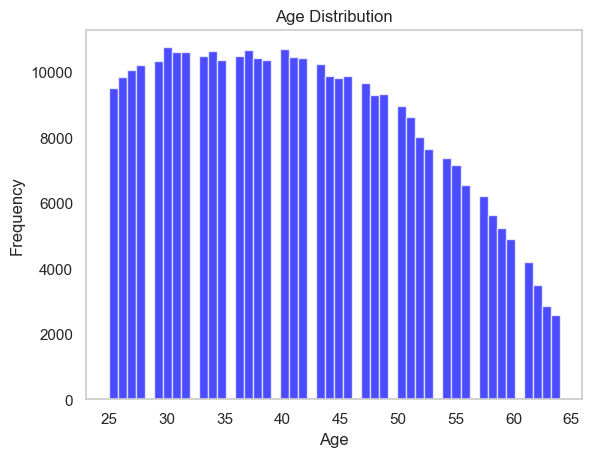

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('path_to_your_dataset.csv')

# Example: Assuming 'age' is a column in your DataFrame
# Plotting age distribution
plt.hist(new_data['age'], bins=50, color='blue', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()


Unique values in 'sex' column: [1 2]
1 - Male, 2 - Female


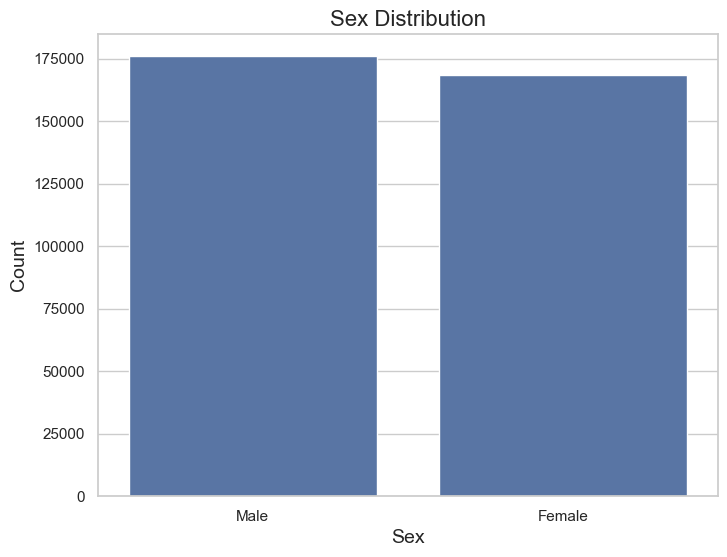

<Figure size 640x480 with 0 Axes>

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Check the unique values in the 'sex' column
print("Unique values in 'sex' column:", new_data['sex'].unique())
print("1 - Male, 2 - Female")

# Step 3: Count the occurrences of each category in the 'sex' column
sex_distribution = new_data['sex'].value_counts()

# Step 4: Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=new_data, x='sex', order=sex_distribution.index)

# Set custom x-axis labels
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])

# Add titles and labels
plt.title('Sex Distribution', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Step 5: Show the plot
plt.show()

# Optional: Save the plot as an image file
plt.savefig('sex_distribution.png', bbox_inches='tight')


/var/folders/v0/6fl9_2q93mggh30x_qf5fyv40000gn/T/ipykernel_1274/1114753855.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=new_data, x='sex', y='uhrswork', palette="pastel")


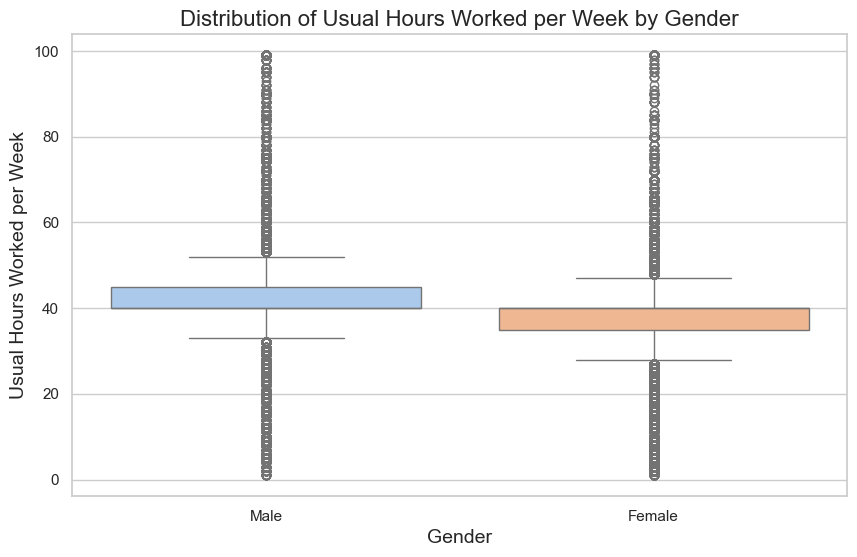

<Figure size 640x480 with 0 Axes>

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sex' represents gender and 'uhrswork' represents usual hours worked per week
# 1 = Male, 2 = Female

# Map 'sex' column to 'Male' and 'Female' labels
new_data['sex'] = new_data['sex'].map({1: 'Male', 2: 'Female'})

# Set plot style
sns.set(style="whitegrid")

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a box plot for usual hours worked per week by gender
sns.boxplot(data=new_data, x='sex', y='uhrswork', palette="pastel")

# Add title and labels
plt.title('Distribution of Usual Hours Worked per Week by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Usual Hours Worked per Week', fontsize=14)

# Show the plot
plt.show()

# Optional: Save the plot as an image file
plt.savefig('hours_worked_by_gender.png', bbox_inches='tight')


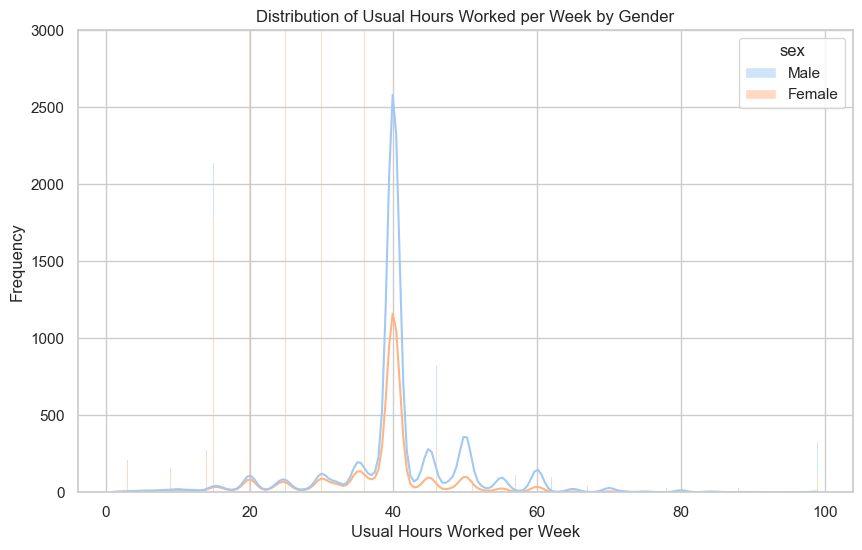

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=new_data, x='uhrswork', hue='sex', multiple='stack', kde=True, palette='pastel')
plt.title('Distribution of Usual Hours Worked per Week by Gender')
plt.xlabel('Usual Hours Worked per Week')
plt.ylabel('Frequency')
plt.ylim(0, 3000)
plt.show()



In [23]:
for i in new_data.dtypes:
    print(i)

int64
float64
int64
int64
float64
float64
int64
int64
int64
object
int64
int64
float64
float64
float64
float64
float64
int64
int64
float64
int64
int64
int64
int64
int64
float64
int64
float64
float64
float64
float64
float64
int64
float64
float64
float64
float64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int64
int64
int64
int64
float64
int64
int64
int64


In [24]:
def remove_outliers_iqr(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    df_cleaned = df.copy()

    for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range

        # Determine bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

    return df_cleaned

In [25]:
# new_data=remove_outliers_iqr(new_data)

# removing outliers is leading to deletion of so much data

In [26]:
new_data

,year,hwtsupp,region,statefip,metro,metarea,pernum,relate,age,sex,...,realhrwage,uncenrealhrwage,hdwfcoh,wagesamp,occ_orig,ind_orig,un_lnrealwg,industry,occupation,education
0,1990,1052.650024,0,36,2.0,5607.0,1,101,58,Male,...,12.269874,12.269874,1,1,335,871,2.507147,10,17,5
1,2009,971.200012,2,5,2.0,8840.0,4,1260,28,Male,...,8.635149,8.635149,0,1,5120,8660,2.155841,11,17,5
2,1990,1622.280029,0,36,3.0,5607.0,1,101,37,Male,...,21.169851,21.169851,1,1,217,380,3.052578,2,4,5
3,1990,2689.909912,3,6,3.0,7400.0,1,101,34,Male,...,20.447746,20.447746,1,1,64,740,3.017873,14,3,3
4,1981,1911.900024,2,51,3.0,8840.0,1,101,38,Male,...,18.892282,18.892282,1,1,245,798,2.938754,14,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344282,1981,970.179993,1,39,3.0,8840.0,2,1260,28,Female,...,16.793140,16.793140,0,1,174,858,2.820971,13,6,3
344283,1999,1753.010010,3,6,3.0,7120.0,4,301,27,Female,...,11.304215,11.304215,0,0,13,10,2.425176,0,0,5
344284,1981,1971.020020,2,48,3.0,8840.0,2,201,36,Female,...,14.447040,14.447040,1,1,231,628,2.670490,7,16,5
344285,2007,715.510010,1,19,4.0,1960.0,2,201,49,Female,...,37.773636,37.773636,1,1,2860,7490,3.631611,14,9,3


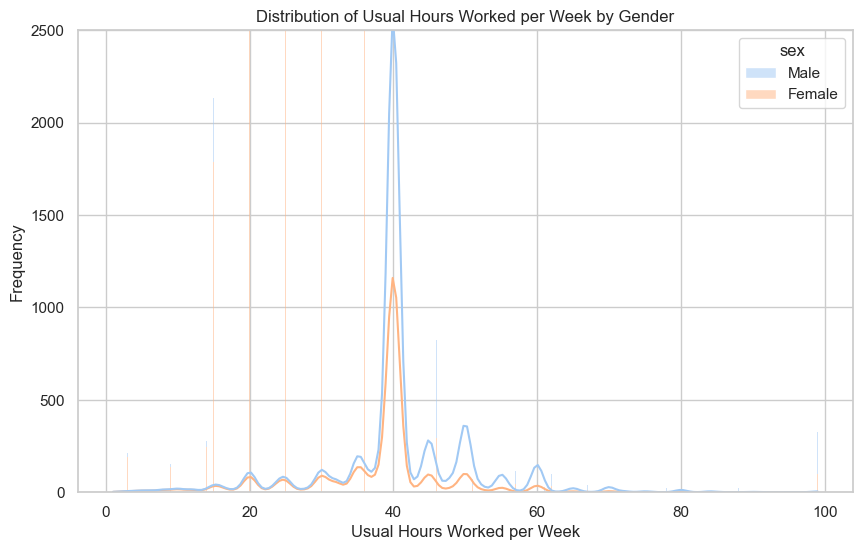

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data=new_data, x='uhrswork', hue='sex', multiple='stack', kde=True, palette='pastel')
plt.title('Distribution of Usual Hours Worked per Week by Gender')
plt.xlabel('Usual Hours Worked per Week')
plt.ylabel('Frequency')
plt.ylim(0, 2500)
plt.show()



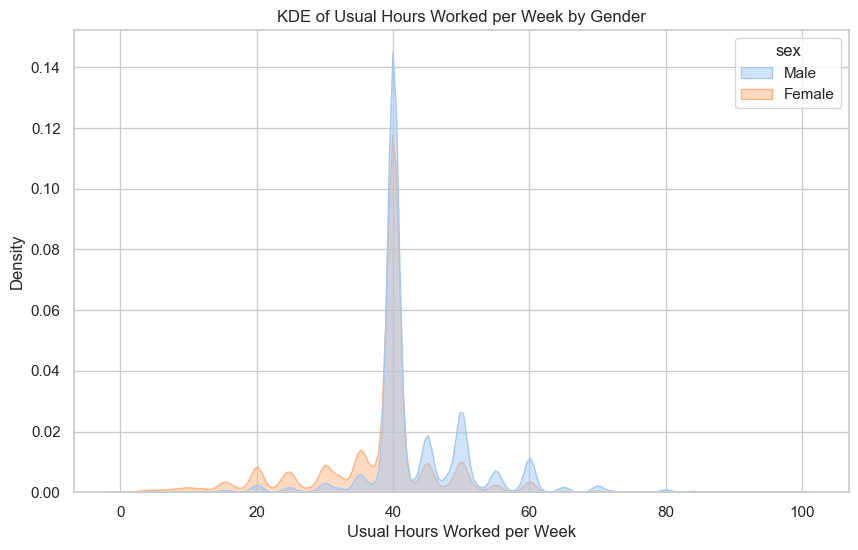

In [28]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=new_data, x='uhrswork', hue='sex', fill=True, palette='pastel', alpha=0.5)
plt.title('KDE of Usual Hours Worked per Week by Gender')
plt.xlabel('Usual Hours Worked per Week')
plt.ylabel('Density')
plt.show()


/var/folders/v0/6fl9_2q93mggh30x_qf5fyv40000gn/T/ipykernel_1274/2478894960.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=new_data, x='sex', y='uhrswork', palette='pastel', ci="sd")
/var/folders/v0/6fl9_2q93mggh30x_qf5fyv40000gn/T/ipykernel_1274/2478894960.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_data, x='sex', y='uhrswork', palette='pastel', ci="sd")


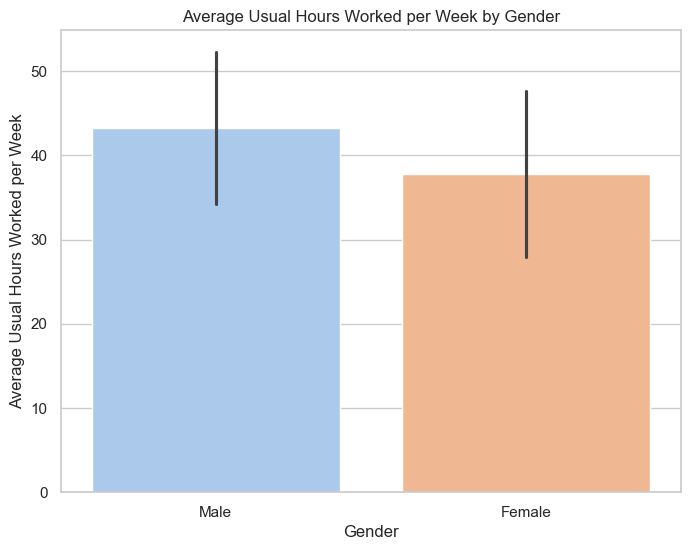

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(data=new_data, x='sex', y='uhrswork', palette='pastel', ci="sd")
plt.title('Average Usual Hours Worked per Week by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Usual Hours Worked per Week')
plt.show()


Descriptive Statistics:
                 age       incwage      education
count  344287.000000  3.442870e+05  344287.000000
mean       41.734364  3.976170e+04       4.140026
std        10.415874  4.529758e+04       1.272586
min        25.000000  1.500000e+01       0.000000
25%        33.000000  1.670000e+04       3.000000
50%        41.000000  3.000000e+04       5.000000
75%        50.000000  5.000000e+04       5.000000
max        64.000000  1.259999e+06       5.000000


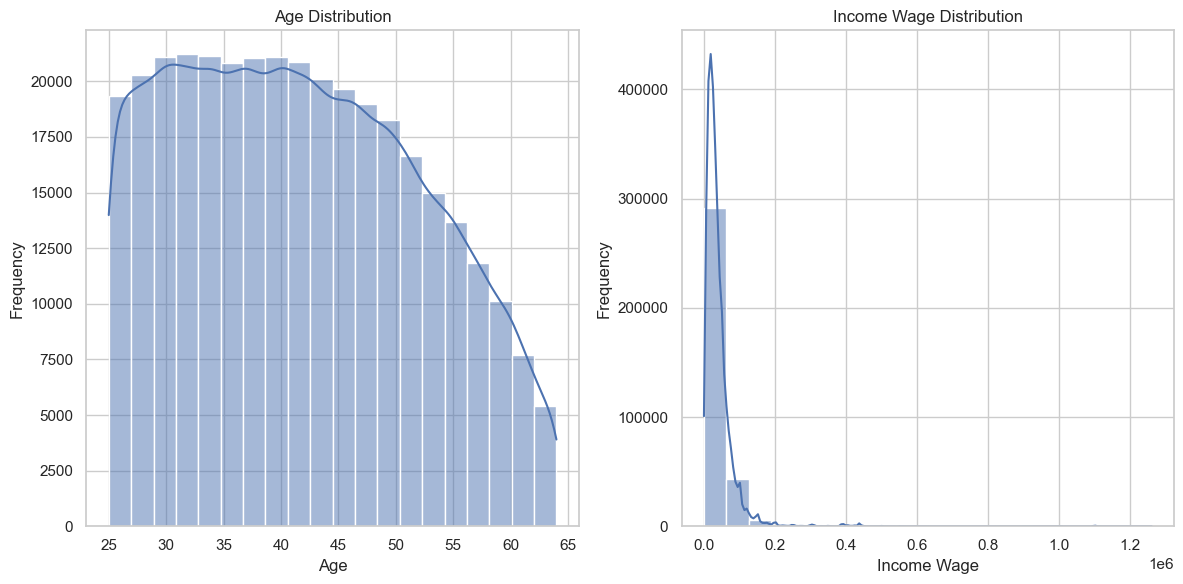

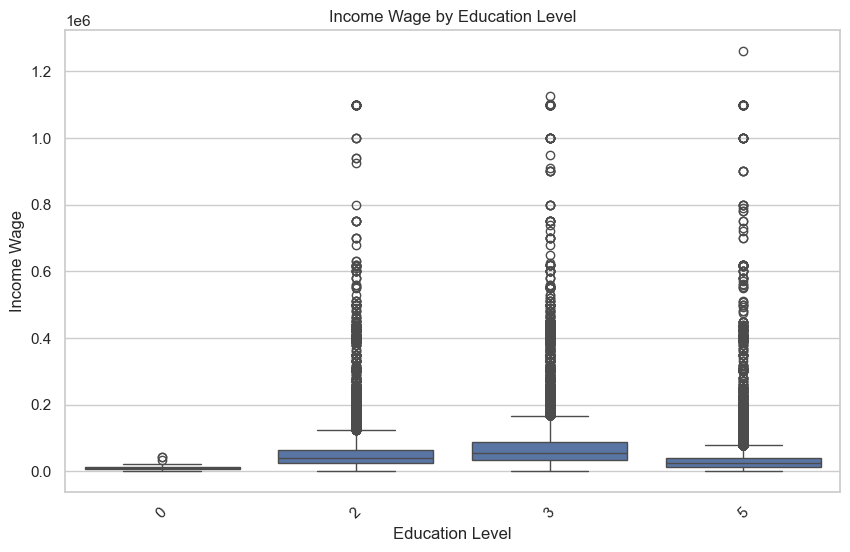

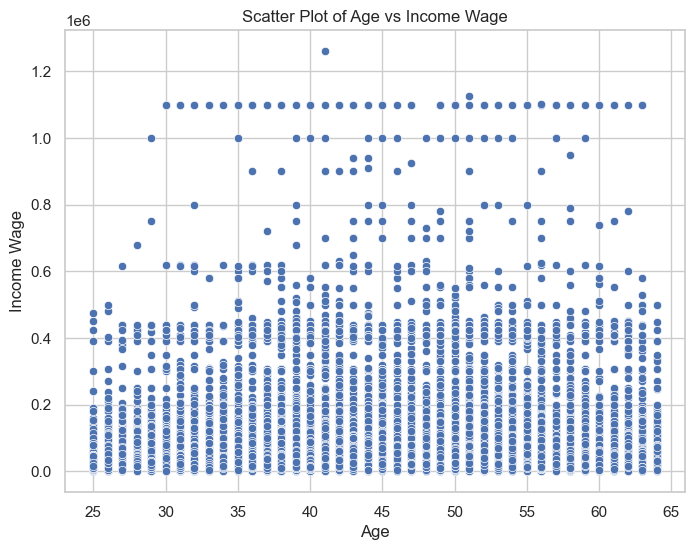

Correlation Matrix:
               age   incwage
age      1.000000  0.122137
incwage  0.122137  1.000000


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Descriptive Statistics
print("Descriptive Statistics:")
print(new_data[['age', 'incwage', 'education']].describe())

# Step 2: Visualizations

# 2.1 Histogram for age
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(new_data['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 2.2 Histogram for incwage
plt.subplot(1, 2, 2)
sns.histplot(new_data['incwage'], bins=20, kde=True)
plt.title('Income Wage Distribution')
plt.xlabel('Income Wage')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2.3 Box plot for incwage by education
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='incwage', data=new_data)
plt.title('Income Wage by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income Wage')
plt.xticks(rotation=45)
plt.show()

# 2.4 Scatter plot for age vs. incwage
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='incwage', data=new_data)
plt.title('Scatter Plot of Age vs Income Wage')
plt.xlabel('Age')
plt.ylabel('Income Wage')
plt.show()

# Step 3: Correlation Analysis
correlation = new_data[['age', 'incwage']].corr()
print("Correlation Matrix:\n", correlation)



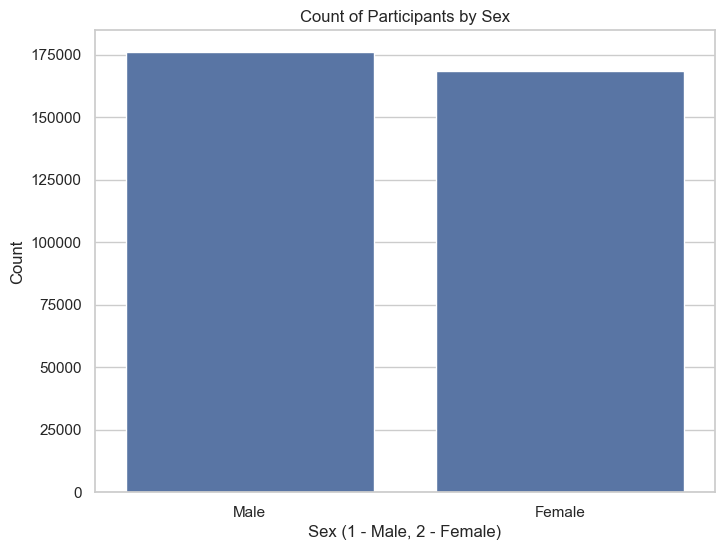

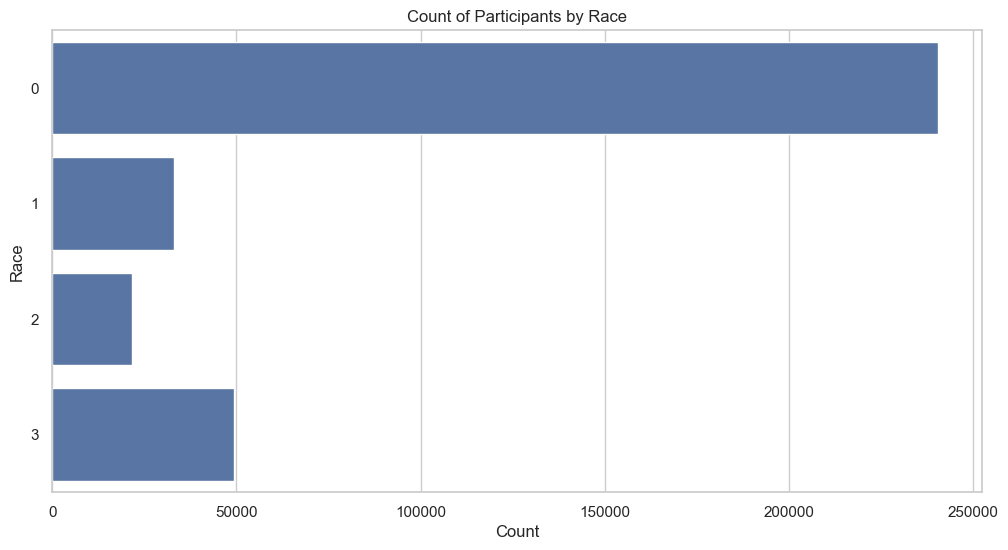

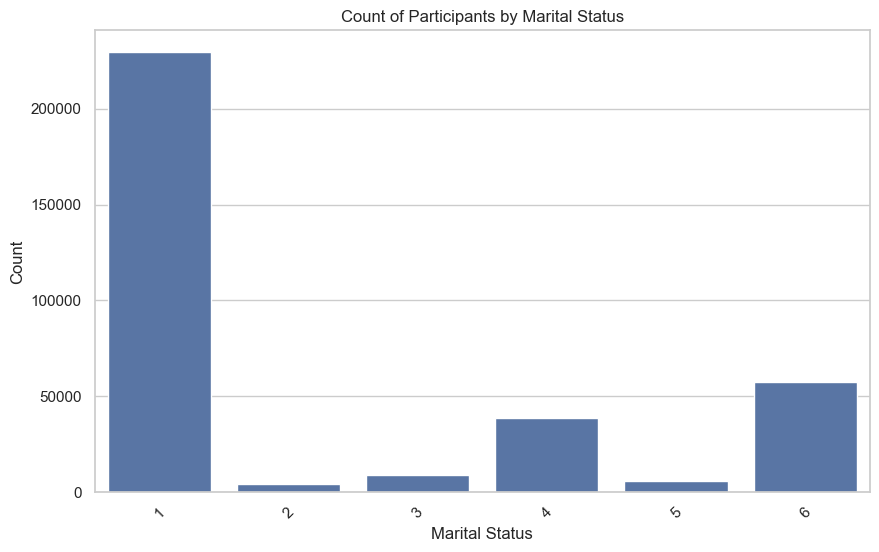

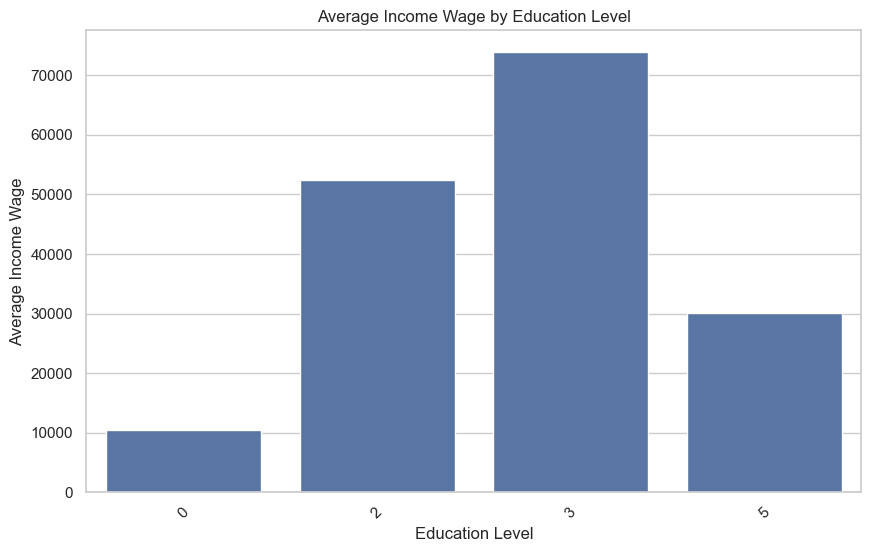

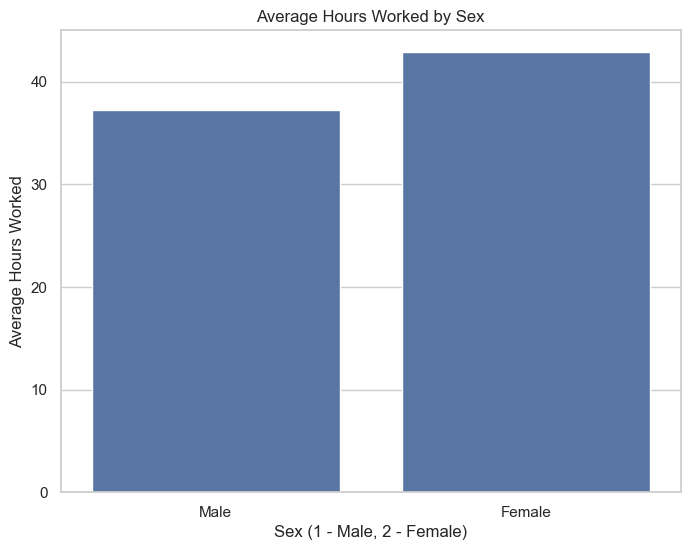

ValueError: could not convert string to float: 'Male'

<Figure size 1200x800 with 0 Axes>

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Categorical Variable Analysis

# 1.1 Count plot for sex
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=new_data)
plt.title('Count of Participants by Sex')
plt.xlabel('Sex (1 - Male, 2 - Female)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

# 1.2 Count plot for race
plt.figure(figsize=(12, 6))
sns.countplot(y='race', data=new_data)
plt.title('Count of Participants by Race')
plt.xlabel('Count')
plt.ylabel('Race')
plt.show()

# 1.3 Count plot for marital status
plt.figure(figsize=(10, 6))
sns.countplot(x='marst', data=new_data)
plt.title('Count of Participants by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Step 2: Group Comparisons

# 2.1 Average income wage by education level
avg_income_by_education = new_data.groupby('education')['incwage'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='education', y='incwage', data=avg_income_by_education)
plt.title('Average Income Wage by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Income Wage')
plt.xticks(rotation=45)
plt.show()

# 2.2 Average hours worked by sex
avg_hours_by_sex = new_data.groupby('sex')['hrswork'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='hrswork', data=avg_hours_by_sex)
plt.title('Average Hours Worked by Sex')
plt.xlabel('Sex (1 - Male, 2 - Female)')
plt.ylabel('Average Hours Worked')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

# Step 3: Heatmap for Correlations
plt.figure(figsize=(12, 8))
correlation_matrix = new_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Step 4: Pair Plots
sns.pairplot(new_data[['age', 'incwage', 'hrswork', 'education']], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Numerical Features', y=1.02)
plt.show()

# Step 5: Time Series Analysis (if applicable)
# Uncomment and modify the following code if you have a year column
# if 'year' in new_data.columns:
#     avg_income_by_year = new_data.groupby('year')['incwage'].mean().reset_index()
#     plt.figure(figsize=(10, 6))
#     sns.lineplot(x='year', y='incwage', data=avg_income_by_year)
#     plt.title('Average Income Wage Over Years')
#     plt.xlabel('Year')
#     plt.ylabel('Average Income Wage')
#     plt.show()


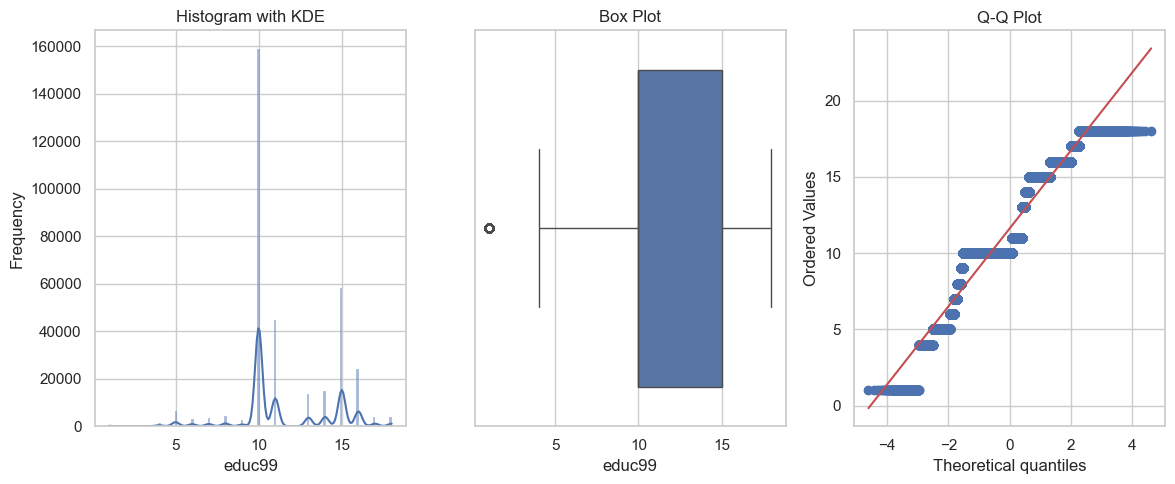

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Choose a numerical column to check for normality
column_to_check = 'incwage'  # Change this to your column of interest
column_to_check = 'uhrswork'
column_to_check = 'educ99'

# Step 1: Histogram
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.histplot(new_data[column_to_check], kde=True)
plt.title('Histogram with KDE')
plt.xlabel(column_to_check)
plt.ylabel('Frequency')

# Step 2: Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(x=new_data[column_to_check])
plt.title('Box Plot')
plt.xlabel(column_to_check)

# Step 3: Q-Q Plot
plt.subplot(1, 3, 3)
stats.probplot(new_data[column_to_check].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()


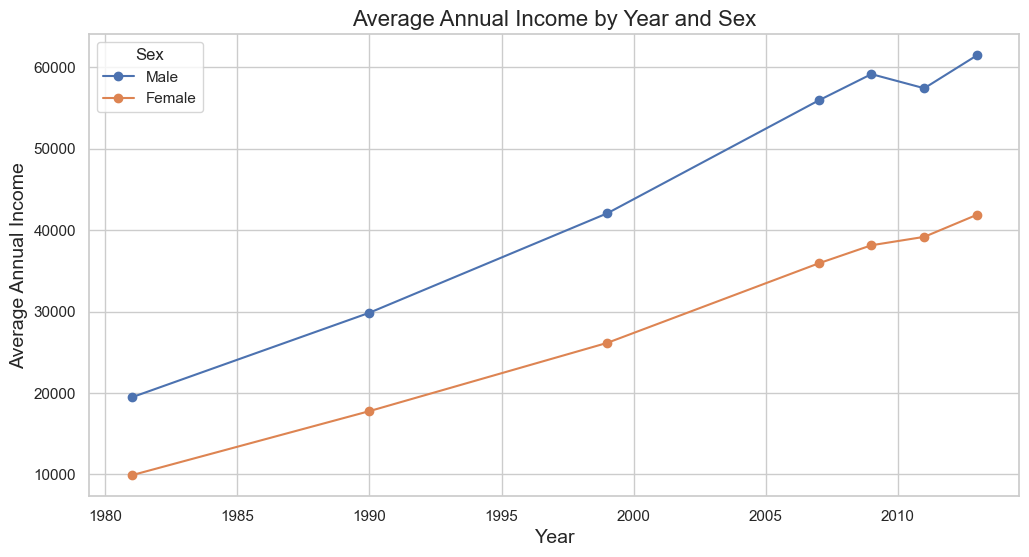

In [46]:
import matplotlib.pyplot as plt

# Group by 'year' and 'sex' to calculate the average income
average_income_by_year_sex = new_data.groupby(['year', 'sex'])['incwage'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 6))

# Plotting 'Male' and 'Female' columns by their labels
plt.plot(average_income_by_year_sex.index, average_income_by_year_sex['Male'], marker='o', linestyle='-', label="Male")
plt.plot(average_income_by_year_sex.index, average_income_by_year_sex['Female'], marker='o', linestyle='-', label="Female")

# Add titles and labels
plt.title("Average Annual Income by Year and Sex", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Annual Income", fontsize=14)
plt.legend(title="Sex")

# Show plot
plt.show()


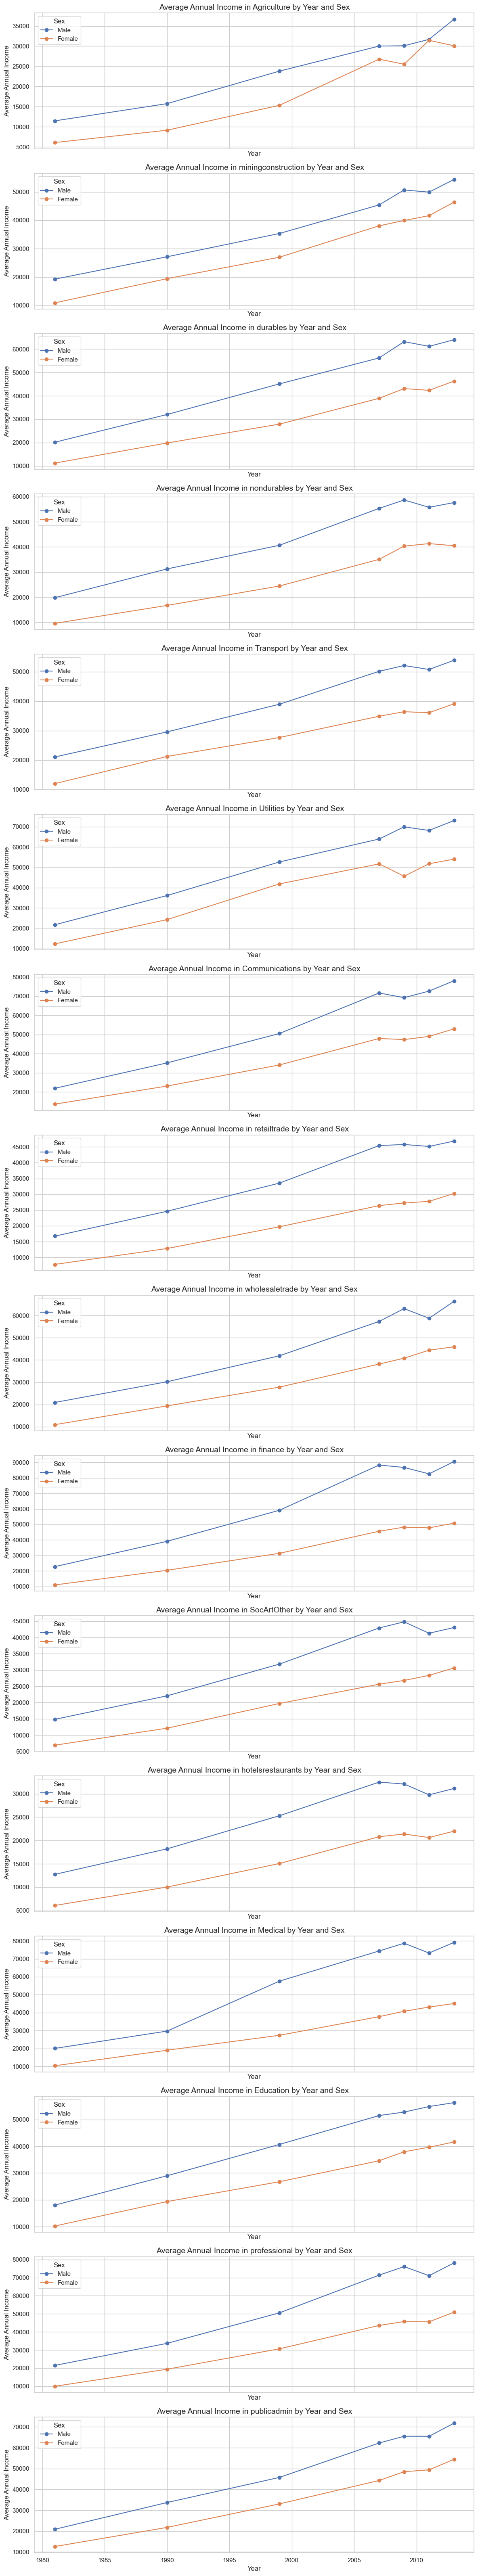

In [51]:
import matplotlib.pyplot as plt

# Group by 'year', 'industry', and 'sex' to calculate the average income
average_income_by_year_industry_sex = new_data.groupby(['year', 'industry', 'sex'])['incwage'].mean().unstack('sex')

# Get unique industries
industries = average_income_by_year_industry_sex.index.get_level_values('industry').unique()

# Set up the subplots: one for each industry
num_industries = len(industries)
fig, axes = plt.subplots(nrows=num_industries, figsize=(12, num_industries * 4), sharex=True)

# Loop over each industry to create individual plots
for i, industry in enumerate(industries):
    ax = axes[i]
    industry_data = average_income_by_year_industry_sex.xs(industry, level='industry')
    
    # Plot for both 'Male' and 'Female' in this industry
    ax.plot(industry_data.index, industry_data['Male'], marker='o', linestyle='-', label="Male")
    ax.plot(industry_data.index, industry_data['Female'], marker='o', linestyle='-', label="Female")
    
    # Add titles and labels
    ax.set_title(f"Average Annual Income in {industry_columns[i]} by Year and Sex", fontsize=14)
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel("Average Annual Income", fontsize=12)
    ax.legend(title="Sex")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


0         10
1         11
2          2
3         14
4         14
          ..
344282    13
344283     0
344284     7
344285    14
344286     7
Name: industry, Length: 344287, dtype: int64

In [112]:
# def load_dataset(file_path):
#     try:
#         data = pd.read_csv(file_path)
#         print(f"Dataset loaded successfully with {data.shape[0]} rows and {data.shape[1]} columns.")
#         return data
#     except Exception as e:
#         print(f"Error loading dataset: {e}")
#         return None

# # Define file paths for your CSV files
# file_path_cps = 'Datasets/CurrentPopulationSurvey.csv'
# file_path_psid = 'Datasets/PanelStudyIncomeDynamics.csv'

# # Load both datasets
# cps_data = load_dataset(file_path_cps)
# psid_data = load_dataset(file_path_psid)

# numerical_columns_cps = cps_data.select_dtypes(include=[np.number]).columns
# numerical_columns_psid = psid_data.select_dtypes(include=[np.number]).columns
# categorical_columns_cps = cps_data.select_dtypes(exclude=[np.number]).columns
# categorical_columns_psid = psid_data.select_dtypes(exclude=[np.number]).columns

In [113]:
# # Cell 3: Display basic information about the datasets
# print("\nCurrent Population Survey Dataset Info:")
# cps_data.info()

# print("\nPanel Study Income Dynamics Dataset Info:")
# psid_data.info()

# # Display the first few rows
# print("\nCurrent Population Survey Dataset Head:")
# print(cps_data.head())

# print("\nPanel Study Income Dynamics Dataset Head:")
# print(psid_data.head())


In [114]:
# # Cell 4: Check for missing values
# print("\nMissing Values in CPS Dataset:")
# missing_values_cps = cps_data.isnull().sum()
# print(missing_values_cps[missing_values_cps > 0])

# print("\nMissing Values in PSID Dataset:")
# missing_values_psid = psid_data.isnull().sum()
# print(missing_values_psid[missing_values_psid > 0])

# # Visualize missing values
# msno.matrix(cps_data)
# plt.title("CPS Missing Values Matrix")
# plt.show()

# msno.matrix(psid_data)
# plt.title("PSID Missing Values Matrix")
# plt.show()


In [115]:
# # Cell 5: Summary statistics for numerical and categorical data
# print("\nSummary Statistics for CPS Dataset:")
# print(cps_data.describe(include='all'))

# print("\nSummary Statistics for PSID Dataset:")
# print(psid_data.describe(include='all'))


In [116]:
# def plot_countplots(data, columns, num_cols=3):
#     num_rows = (len(columns) + num_cols - 1) // num_cols
#     fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
#     axes = axes.flatten()

#     for i, column in enumerate(columns):
#         sns.countplot(data=data, x=column, ax=axes[i])
#         axes[i].set_title(f'Distribution of {column}')

#     for j in range(i + 1, len(axes)):
#         axes[j].axis('off')

#     plt.tight_layout()
#     plt.show()

# # Count plots for CPS dataset
# categorical_columns_cps = cps_data.select_dtypes(exclude=[np.number]).columns
# plot_countplots(cps_data, categorical_columns_cps)

# # Count plots for PSID dataset
# categorical_columns_psid = psid_data.select_dtypes(exclude=[np.number]).columns
# plot_countplots(psid_data, categorical_columns_psid)